# = Analisis Sentimen =

In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import string
import re
import nltk
from sklearn import pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# = Load Data =

In [ ]:
# ------ Data Text --------
# csv Data name
Data_sampel = ('E:\Program\[2] Program\AnSent\Data\Data_2_sampel\Indihome_all.csv')
Data_rem = ('E:\Program\[2] Program\AnSent\Data\Data_2_S_Remove\Rem_indihome.csv') #remove duppilcate
Data_prepro = ('E:\Program\[2] Program\AnSent\Data\Data_4_prepro\Pre_Indihome.csv')
# Data_prepro_2 = ('Data\Data_4_Prepro_rem\Indihome.csv') 
Data_lex = ('E:\Program\[2] Program\AnSent\Data\Data_5_Lex_sen\Lex_Indihome.csv')

In [ ]:
#data1 = data input
data1 = pd.read_csv(Data_sampel, sep=(','))
data1.head()


,Unnamed: 0,Unnamed: 0.1,Tanggal,User ID,Data Teks
0,12473,12473,2021-10-27 07:31:26+00:00,arifsaadil,"@IndiHomeCare Sudah dilakukan sesuai DM, belum..."
1,9030,9030,2021-10-11 10:42:41+00:00,tojizru,@chifoeyuu P @IndiHome
2,8294,8294,2021-10-30 05:33:15+00:00,IndiHomeCare,@DilaPong Kak Dila. Uci cek updatenya dijadwal...
3,9506,9506,2021-10-09 12:36:33+00:00,lalafindyou_,@IndiHome ni kapan ya wifinya bener. Aku mau n...
4,3036,3036,2021-10-23 11:43:16+00:00,Razyajii,"Oy Mola TV di Indihome nape tak bisa dibuka, a..."


# Remove Duplicate

In [ ]:
# #sort by name or number
# data1.sort_values('Data Teks_Stopword', ascending=False)

# jumlah data awal
index = data1.index
jumlah = len(index)

print('Jumlah data awal:',jumlah)

#jumlah data yang sama
data_sama = data1.duplicated(subset= "Data Teks").sum()
print('Jumlah data yang sama:',data_sama)

#remove duplicate data
remove_data = data1.drop_duplicates(subset = 'Data Teks', keep = 'first', inplace = True)
index = data1.index
jumlah = len(index)

print('Jumlah data sekarang:',jumlah)
data1.to_csv(Data_rem)

Jumlah data awal: 8000
Jumlah data yang sama: 211
Jumlah data sekarang: 7789


# = Pre-Processing =

# = CaseFolding =

In [ ]:
# ------ Proses CaseFolding --------
#------ Clean Text --------
#casefolding
data1['Data Teks_CaseFolding'] = data1['Data Teks'].str.lower()

def clean_text(tweet_clean):
  tweet_clean = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",str(tweet_clean)).split()) #mengghilangkan data teks (@, # dan link)
  tweet_clean = re.sub(r'\b\w{1,2}\b', '', tweet_clean) #menghilangkan 2 kata
  tweet_clean = re.sub('\s+',' ',tweet_clean)
  tweet_clean = re.sub(r"\d+", "", tweet_clean)
  #tweet_clean = removeDupWithOrder(tweet_clean) #mengghilangkan kata duplikat
  tweet_clean = tweet_clean.translate(str.maketrans("","",string.punctuation))# ini untuk apa 
  return tweet_clean
data1['Data Teks_CaseFolding'] = data1['Data Teks_CaseFolding'].apply(lambda x: clean_text(x))
data1.head()

,Unnamed: 0,Unnamed: 0.1,Tanggal,User ID,Data Teks,Data Teks_CaseFolding
0,12473,12473,2021-10-27 07:31:26+00:00,arifsaadil,"@IndiHomeCare Sudah dilakukan sesuai DM, belum...",sudah dilakukan sesuai belum bisa
1,9030,9030,2021-10-11 10:42:41+00:00,tojizru,@chifoeyuu P @IndiHome,
2,8294,8294,2021-10-30 05:33:15+00:00,IndiHomeCare,@DilaPong Kak Dila. Uci cek updatenya dijadwal...,kak dila uci cek updatenya dijadwalkan kembali...
3,9506,9506,2021-10-09 12:36:33+00:00,lalafindyou_,@IndiHome ni kapan ya wifinya bener. Aku mau n...,kapan wifinya bener aku mau nugas hikdddd pad...
4,3036,3036,2021-10-23 11:43:16+00:00,Razyajii,"Oy Mola TV di Indihome nape tak bisa dibuka, a...",mola indihome nape tak bisa dibuka appsnya il...


# = Normalize =

In [ ]:
alay_dict = pd.read_csv(r'E:\Program\[2] Program\AnSent\Dict_Used\kamus_baku.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

data1['Data Teks_clean_alay'] = data1['Data Teks_CaseFolding'].apply(normalize_alay) 
data1.drop_duplicates(keep=False,inplace=True)

# = Tokenize =

In [ ]:
# ------ Proses Tokenizing --------
def token(tweet_clean):
  tweet_clean = re.split('\W+', tweet_clean)
  return tweet_clean

data1['Data Teks_Token'] = data1['Data Teks_clean_alay'].apply(lambda x: token(x))
data1.head()

,Unnamed: 0,Unnamed: 0.1,Tanggal,User ID,Data Teks,Data Teks_CaseFolding,Data Teks_clean_alay,Data Teks_Token
0,12473,12473,2021-10-27 07:31:26+00:00,arifsaadil,"@IndiHomeCare Sudah dilakukan sesuai DM, belum...",sudah dilakukan sesuai belum bisa,sudah dilakukan sesuai belum bisa,"[sudah, dilakukan, sesuai, belum, bisa]"
1,9030,9030,2021-10-11 10:42:41+00:00,tojizru,@chifoeyuu P @IndiHome,,,[]
2,8294,8294,2021-10-30 05:33:15+00:00,IndiHomeCare,@DilaPong Kak Dila. Uci cek updatenya dijadwal...,kak dila uci cek updatenya dijadwalkan kembali...,kak dila uci cek updatenya dijadwalkan kembali...,"[kak, dila, uci, cek, updatenya, dijadwalkan, ..."
3,9506,9506,2021-10-09 12:36:33+00:00,lalafindyou_,@IndiHome ni kapan ya wifinya bener. Aku mau n...,kapan wifinya bener aku mau nugas hikdddd pad...,kapan wifinya benar saya mau nugas hikdddd pa...,"[, kapan, wifinya, benar, saya, mau, nugas, hi..."
4,3036,3036,2021-10-23 11:43:16+00:00,Razyajii,"Oy Mola TV di Indihome nape tak bisa dibuka, a...",mola indihome nape tak bisa dibuka appsnya il...,mola indihome nape tidak bisa dibuka appsnya ...,"[, mola, indihome, nape, tidak, bisa, dibuka, ..."


# = Stopwords =

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')
print(len(list_stopwords))

# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(['b',"yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'kak'])
len(list_stopwords)
# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("E:\Program\[2] Program\AnSent\Dict_Used\stopwordsID.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
len(list_stopwords)
# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data1['Data Teks_Stopword'] = data1['Data Teks_Token'].apply(lambda x: stopwords_removal(x)) 


print(data1['Data Teks_Stopword'])

758
0                                                [sesuai]
1                                                      []
2       [dila, uci, cek, updatenya, dijadwalkan, esok,...
3                      [, wifinya, nugas, hikdddd, bayar]
4        [, mola, indihome, nape, dibuka, appsnya, ilang]
                              ...                        
7994    [, admin, koneksi, lost, koneksi, indikator, r...
7995    [halo, nana, bantu, respon, silahkan, cek, ter...
7996    [halo, sobat, keluhan, seputar, produk, indiho...
7997    [hai, tettyrhs, maaf, terkait, informasi, kelu...
7999           [admin, digit, mohon, bantuannya, makasih]
Name: Data Teks_Stopword, Length: 7789, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Hide Code

In [ ]:
# import nltk
# from nltk.tokenize import word_tokenize
# nltk.download('punkt') 

# # NLTK word rokenize 
# def word_tokenize_wrapper(text):
#     return word_tokenize(text)

# data1['Data Teks_Token'] = data1['Data Teks_clean_alay'].apply(word_tokenize_wrapper)

In [ ]:
#membersihkan @ pada username
#def clean_text(tweet_clean):
 #   tweet_clean = re.sub(r'[@]', r' ', tweet_clean)
 #   return tweet_clean
#df['author'] = df['author'].apply(lambda x: clean_text(x))
#df.head(5)

In [ ]:
# # ------ Proses Tokenizing --------
# def token(tweet_clean):
#   tweet_clean = re.split('\W+', tweet_clean)
#   return tweet_clean

# data1['Data Teks_Token'] = data1['Data Teks_clean_alay'].apply(token)
# data1.head()

In [ ]:
# # ------ Text Filtering --------
# #import stopwords (nltk)
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# filtering = stopwords.words('indonesian', 'english')

# def remove_stopwords(tweet_clean):
#   x = []
#   data1 = []
#   def myFunc(x):
#     if x in filtering:
#       return False
#     else:
#       return True
#   fit = filter(myFunc, tweet_clean)
#   for x in fit:
#     data1.append(x)
#   return data1
# data1['Data Teks_Filter'] = data1['Data Teks_Token'].apply(remove_stopwords)
# data1.head(5)

In [ ]:
# Stemming
    # pada proses ini tidak dilakukan,
    # karena proses stemming sangat lama,
    # membutuhkan kiranya 1 jam untuk memproses
    # 6000an data

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(baris):
#   factory = StemmerFactory()
#   stemmer = factory.create_stemmer()
#   do = []
#   for w in baris:
#     dt = stemmer.stem(w)
#     do.append(dt)
#   d_clean = []
#   d_clean = ' '.join(do)
#   print(d_clean)
#   return d_clean

# data1['Data Teks_Stemming'] = data1['Data Teks_Stopword'].apply(lambda x: stemming(x))
# data1.head(5)

# = Stemming =

In [ ]:
stop_removal = data1['Data Teks_Stopword']

def fit_stopwords(tweet_clean):
    tweet_clean =np.array(tweet_clean)
    tweet_clean =' '.join(tweet_clean)
#    tweet_clean = tweet_clean.tosring()
#    tweet_clean = str(tweet_clean)
    return tweet_clean

data1['Data Teks_Stemming'] = data1['Data Teks_Stopword'].apply(lambda x: fit_stopwords(x))
data1.head(5)

,Unnamed: 0,Unnamed: 0.1,Tanggal,User ID,Data Teks,Data Teks_CaseFolding,Data Teks_clean_alay,Data Teks_Token,Data Teks_Stopword,Data Teks_Stemming
0,12473,12473,2021-10-27 07:31:26+00:00,arifsaadil,"@IndiHomeCare Sudah dilakukan sesuai DM, belum...",sudah dilakukan sesuai belum bisa,sudah dilakukan sesuai belum bisa,"[sudah, dilakukan, sesuai, belum, bisa]",[sesuai],sesuai
1,9030,9030,2021-10-11 10:42:41+00:00,tojizru,@chifoeyuu P @IndiHome,,,[],[],
2,8294,8294,2021-10-30 05:33:15+00:00,IndiHomeCare,@DilaPong Kak Dila. Uci cek updatenya dijadwal...,kak dila uci cek updatenya dijadwalkan kembali...,kak dila uci cek updatenya dijadwalkan kembali...,"[kak, dila, uci, cek, updatenya, dijadwalkan, ...","[dila, uci, cek, updatenya, dijadwalkan, esok,...",dila uci cek updatenya dijadwalkan esok jam pe...
3,9506,9506,2021-10-09 12:36:33+00:00,lalafindyou_,@IndiHome ni kapan ya wifinya bener. Aku mau n...,kapan wifinya bener aku mau nugas hikdddd pad...,kapan wifinya benar saya mau nugas hikdddd pa...,"[, kapan, wifinya, benar, saya, mau, nugas, hi...","[, wifinya, nugas, hikdddd, bayar]",wifinya nugas hikdddd bayar
4,3036,3036,2021-10-23 11:43:16+00:00,Razyajii,"Oy Mola TV di Indihome nape tak bisa dibuka, a...",mola indihome nape tak bisa dibuka appsnya il...,mola indihome nape tidak bisa dibuka appsnya ...,"[, mola, indihome, nape, tidak, bisa, dibuka, ...","[, mola, indihome, nape, dibuka, appsnya, ilang]",mola indihome nape dibuka appsnya ilang


# +Save Preprocessing

In [ ]:
data1.dropna()
# data1['Data Teks_Stemming']=data1['Data Teks_Stemming'].str.replace(' ', '')
data1.drop_duplicates(subset='Data Teks_Stemming',
                      keep= 'first',inplace=True)
data1.to_csv(Data_prepro, index=False, header=True)
# data2 = pd.read_csv(Data_prepro, sep=',').dropna(subset=['Data Teks_Stemming'])
data1.head(5)

,Unnamed: 0,Unnamed: 0.1,Tanggal,User ID,Data Teks,Data Teks_CaseFolding,Data Teks_clean_alay,Data Teks_Token,Data Teks_Stopword,Data Teks_Stemming
0,12473,12473,2021-10-27 07:31:26+00:00,arifsaadil,"@IndiHomeCare Sudah dilakukan sesuai DM, belum...",sudah dilakukan sesuai belum bisa,sudah dilakukan sesuai belum bisa,"[sudah, dilakukan, sesuai, belum, bisa]",[sesuai],sesuai
1,9030,9030,2021-10-11 10:42:41+00:00,tojizru,@chifoeyuu P @IndiHome,,,[],[],
2,8294,8294,2021-10-30 05:33:15+00:00,IndiHomeCare,@DilaPong Kak Dila. Uci cek updatenya dijadwal...,kak dila uci cek updatenya dijadwalkan kembali...,kak dila uci cek updatenya dijadwalkan kembali...,"[kak, dila, uci, cek, updatenya, dijadwalkan, ...","[dila, uci, cek, updatenya, dijadwalkan, esok,...",dila uci cek updatenya dijadwalkan esok jam pe...
3,9506,9506,2021-10-09 12:36:33+00:00,lalafindyou_,@IndiHome ni kapan ya wifinya bener. Aku mau n...,kapan wifinya bener aku mau nugas hikdddd pad...,kapan wifinya benar saya mau nugas hikdddd pa...,"[, kapan, wifinya, benar, saya, mau, nugas, hi...","[, wifinya, nugas, hikdddd, bayar]",wifinya nugas hikdddd bayar
4,3036,3036,2021-10-23 11:43:16+00:00,Razyajii,"Oy Mola TV di Indihome nape tak bisa dibuka, a...",mola indihome nape tak bisa dibuka appsnya il...,mola indihome nape tidak bisa dibuka appsnya ...,"[, mola, indihome, nape, tidak, bisa, dibuka, ...","[, mola, indihome, nape, dibuka, appsnya, ilang]",mola indihome nape dibuka appsnya ilang


In [ ]:
# jumlah data setelah prepro
index = data1.index
jumlah = len(index)

print('Jumlah data prepo:',jumlah)

Jumlah data prepo: 6976


In [ ]:
#=============================================================================================================

# +++++++++++++VISUALISASI++++++++++++++++++++

# Menghitung 10 Besar Kata yang sering muncul (dari atas)

In [ ]:
top_N = 20
a = data1['Data Teks_Stemming'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Kata', 'Banyak'])
print(rslt)

                   Kata  Banyak
0                 nomor    1795
1                terima    1698
2                 kasih    1677
3              internet    1272
4                   cek    1235
5              silahkan    1062
6          informasikan     926
7                   hai     920
8                  halo     908
9              indihome     830
10                bantu     757
11                  via     723
12                admin     722
13                kakak     662
14             jaringan     659
15              dibantu     596
16                mohon     546
17  semangatdigitalmuda     546
18              layanan     535
19                bayar     465


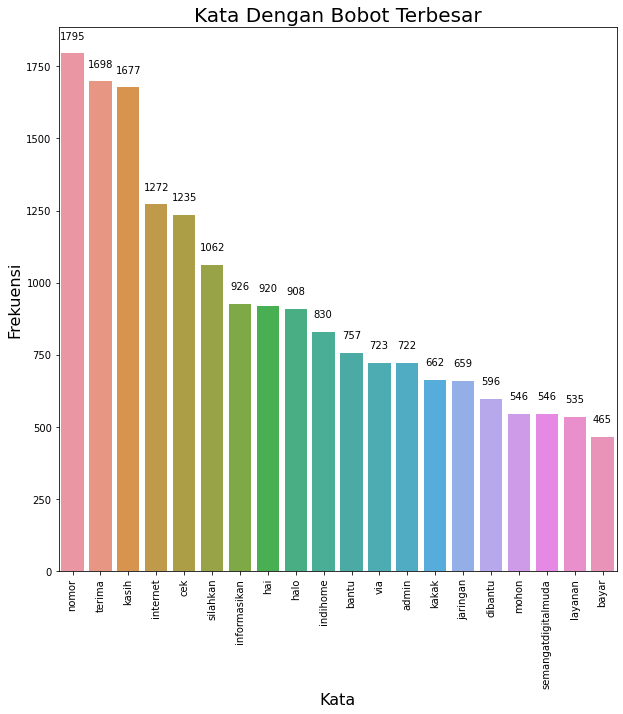

In [135]:
# Plotting Barplot
plt.figure(figsize = (10,10))
sns.barplot(x = rslt['Kata'],y = rslt['Banyak'])
for i, v in enumerate(rslt['Banyak'].tolist()):
    plt.text(i-len(str(v))/10-.05, v + 50, str(v),fontsize=10)
plt.title('Kata Dengan Bobot Terbesar',fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Kata',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.show()

# Source CODE
https://github.com/commitunuja/analisis-sentimen-naive-bayes-tf-idf/blob/master/.ipynb_checkpoints/Untitled-checkpoint.ipynb

# = Lexicon =

In [136]:
#sentimen Lexicon
#Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('E:\Program\[2] Program\AnSent\Dict_Used\lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('E:\Program\[2] Program\AnSent\Dict_Used\lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positif'
    elif (score < 0):
        polarity = 'negatif'
    else:
        polarity = 'netral'
    return score, polarity

results = data1['Data Teks_Token'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data1['jumlah_polarity'] = results[0]
data1['sentimen'] = results[1]
print(data1['sentimen'].value_counts())

negatif    3535
positif    2886
netral      555
Name: sentimen, dtype: int64


# +Save Leksikon

In [137]:
data1.dropna()
data1.drop_duplicates(subset='Data Teks_Stemming',
                      keep= 'first',inplace=True)
data1.to_csv(Data_lex, index=False, header=True)
# data2 = pd.read_csv(Data_lex,usecols=['Data Teks_Stemming', 'jumlah_polarity', 'sentimen']).dropna()
# data2.drop_duplicates(subset=['Data Teks_Stemming'], keep= False, inplace= True)
data1.head(5)

,Unnamed: 0,Unnamed: 0.1,Tanggal,User ID,Data Teks,Data Teks_CaseFolding,Data Teks_clean_alay,Data Teks_Token,Data Teks_Stopword,Data Teks_Stemming,jumlah_polarity,sentimen
0,12473,12473,2021-10-27 07:31:26+00:00,arifsaadil,"@IndiHomeCare Sudah dilakukan sesuai DM, belum...",sudah dilakukan sesuai belum bisa,sudah dilakukan sesuai belum bisa,"[sudah, dilakukan, sesuai, belum, bisa]",[sesuai],sesuai,4,positif
1,9030,9030,2021-10-11 10:42:41+00:00,tojizru,@chifoeyuu P @IndiHome,,,[],[],,0,netral
2,8294,8294,2021-10-30 05:33:15+00:00,IndiHomeCare,@DilaPong Kak Dila. Uci cek updatenya dijadwal...,kak dila uci cek updatenya dijadwalkan kembali...,kak dila uci cek updatenya dijadwalkan kembali...,"[kak, dila, uci, cek, updatenya, dijadwalkan, ...","[dila, uci, cek, updatenya, dijadwalkan, esok,...",dila uci cek updatenya dijadwalkan esok jam pe...,-8,negatif
3,9506,9506,2021-10-09 12:36:33+00:00,lalafindyou_,@IndiHome ni kapan ya wifinya bener. Aku mau n...,kapan wifinya bener aku mau nugas hikdddd pad...,kapan wifinya benar saya mau nugas hikdddd pa...,"[, kapan, wifinya, benar, saya, mau, nugas, hi...","[, wifinya, nugas, hikdddd, bayar]",wifinya nugas hikdddd bayar,-3,negatif
4,3036,3036,2021-10-23 11:43:16+00:00,Razyajii,"Oy Mola TV di Indihome nape tak bisa dibuka, a...",mola indihome nape tak bisa dibuka appsnya il...,mola indihome nape tidak bisa dibuka appsnya ...,"[, mola, indihome, nape, tidak, bisa, dibuka, ...","[, mola, indihome, nape, dibuka, appsnya, ilang]",mola indihome nape dibuka appsnya ilang,-13,negatif


In [138]:
# jumlah data setelah leksikon
index = data1.index
jumlah = len(index)

print('Jumlah data lex:',jumlah)

Jumlah data lex: 6976


# = Visualiasi =
### Perbandingan Sentimen

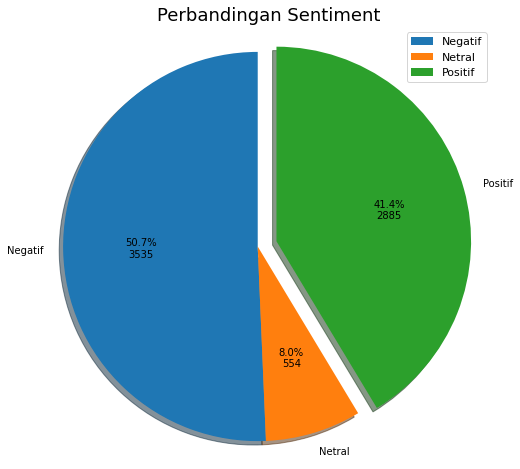

In [139]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)

sentimen = data1['Data Teks_Stopword'].groupby(data1['sentimen']).count().values

plt.figure(figsize = (8,8))
plt.pie(sentimen, explode=(0,0,0.1), labels=['Negatif', 'Netral','Positif'], shadow=True,
        autopct=lambda pct: pct_pie(pct, sentimen),startangle=90)
plt.title('Perbandingan Sentiment',fontsize=18)
plt.axis('equal')
plt.legend(fontsize=11)
plt.show()

In [140]:
# Melihat banyak Tweet perhari berdasarkan sentiment
data1['Tanggal'] = pd.to_datetime(data1['Tanggal'])
tph = data1['Data Teks_Stopword'].groupby([data1['Tanggal'].dt.date, data1['sentimen']]).count()
frek = tph.values

# To Data Frame
tanggal = [ i for i, j in tph.index.tolist() ]
senti = [ j for i, j in tph.index.tolist() ]
sent = pd.DataFrame({'Tanggal':tanggal,'sentiment':senti, 'Frekuensi':frek})

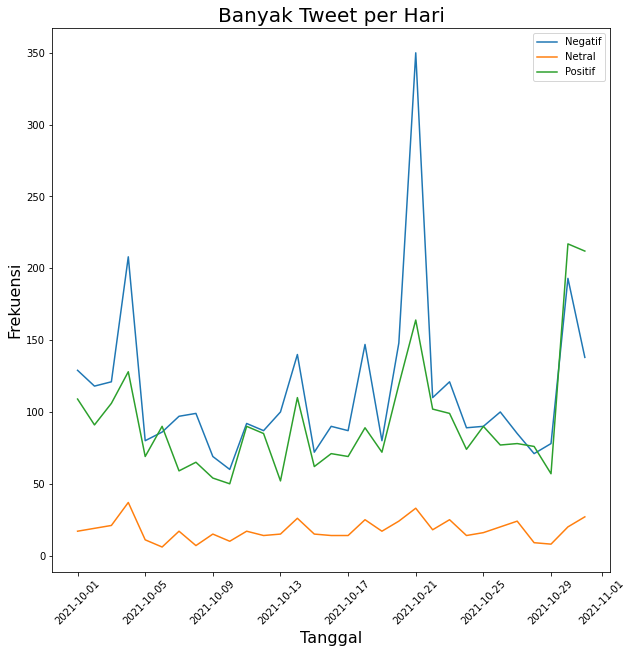

In [141]:
# Plotting line
plt.figure(figsize = (10,10))
sns.lineplot(x='Tanggal',y='Frekuensi',hue='sentiment',data=sent)
plt.title('Banyak Tweet per Hari',fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Tanggal',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.legend(['Negatif','Netral','Positif'])
plt.show()

# = TF-IDF =
pembobotan kata

In [ ]:
# # convert list formated string to list
# import ast
# import numpy as np
# index = 1

# def convert_text_list(texts):
#     texts = ast.literal_eval(texts)
#     return [text for text in texts]

# data["Data Teks_list"] = data["Data Teks_stemmed"].apply(convert_text_list)


# print(data["Data Teks_list"][index])

# print("\ntype : ", type(data["Data Teks_list"]))

In [142]:
# def calc_TF(document):
#     # Counts the number of times the word appears in review
#     TF_dict = {}
#     for term in document:
#         if term in TF_dict:
#             TF_dict[term] += 1
#         else:
#             TF_dict[term] = 1
#     # Computes tf for each word
#     for term in TF_dict:
#         TF_dict[term] = TF_dict[term] / len(document)
#     return TF_dict

# data["TF_dict"] = data['tweet_list'].apply(calc_TF)

# data["TF_dict"].head()

In [ ]:
# print('%20s' % "term", "\t", "TF\n")
# for key in data["TF_dict"][index]:
#     print('%20s' % key, "\t", data["TF_dict"][index][key])

In [ ]:
# def calc_DF(tfDict):
#     count_DF = {}
#     # Run through each document's tf dictionary and increment countDict's (term, doc) pair
#     for document in tfDict:
#         for term in document:
#             if term in count_DF:
#                 count_DF[term] += 1
#             else:
#                 count_DF[term] = 1
#     return count_DF

# DF = calc_DF(data["TF_dict"])

In [ ]:
# n_document = len(data)

# def calc_IDF(__n_document, __DF):
#     IDF_Dict = {}
#     for term in __DF:
#         IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
#     return IDF_Dict
  
# #Stores the idf dictionary
# IDF = calc_IDF(n_document, DF)

In [ ]:
# #calc TF-IDF
# def calc_TF_IDF(TF):
#     TF_IDF_Dict = {}
#     #For each word in the review, we multiply its tf and its idf.
#     for key in TF:
#         TF_IDF_Dict[key] = TF[key] * IDF[key]
#     return TF_IDF_Dict

# #Stores the TF-IDF Series
# data["TF-IDF_dict"] = data["TF_dict"].apply(calc_TF_IDF)

In [ ]:
# print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
# for key in data["TF-IDF_dict"][index]:
#     print('%20s' % key, "\t", data["TF_dict"][index][key] ,"\t" , data["TF-IDF_dict"][index][key])

In [ ]:
# # sort descending by value for DF dictionary 
# sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# # Create a list of unique words from sorted dictionay `sorted_DF`
# unique_term = [item[0] for item in sorted_DF]

# def calc_TF_IDF_Vec(__TF_IDF_Dict):
#     TF_IDF_vector = [0.0] * len(unique_term)

#     # For each unique word, if it is in the review, store its TF-IDF value.
#     for i, term in enumerate(unique_term):
#         if term in __TF_IDF_Dict:
#             TF_IDF_vector[i] = __TF_IDF_Dict[term]
#     return TF_IDF_vector

# data["TF_IDF_Vec"] = data["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

# print("print first row matrix TF_IDF_Vec Series\n")
# print(data["TF_IDF_Vec"][0])

# print("\nmatrix size : ", len(data["TF_IDF_Vec"][0]))

In [ ]:
# # Convert Series to List
# TF_IDF_Vec_List = np.array(data["TF_IDF_Vec"].to_list())

# # Sum element vector in axis=0 
# sums = TF_IDF_Vec_List.sum(axis=0)

# data_tf_idf = []

# for col, term in enumerate(unique_term):
#     data_tf_idf.append((term, sums[col]))
    
# ranking = pd.DataFrame(data_tf_idf, columns=['term', 'rank'])
# ranking.sort_values('rank', ascending=False)

# Pemodelan

## Loading Sample Data

In [143]:
# # Loading Sample tweet sentiment
# sample = pd.read_csv(Data_prepro).dropna()
# sample.head()

,Unnamed: 0,Unnamed: 0.1,Tanggal,User ID,Data Teks,Data Teks_CaseFolding,Data Teks_clean_alay,Data Teks_Token,Data Teks_Stopword,Data Teks_Stemming
0,12473,12473,2021-10-27 07:31:26+00:00,arifsaadil,"@IndiHomeCare Sudah dilakukan sesuai DM, belum...",sudah dilakukan sesuai belum bisa,sudah dilakukan sesuai belum bisa,"['sudah', 'dilakukan', 'sesuai', 'belum', 'bisa']",['sesuai'],sesuai
2,8294,8294,2021-10-30 05:33:15+00:00,IndiHomeCare,@DilaPong Kak Dila. Uci cek updatenya dijadwal...,kak dila uci cek updatenya dijadwalkan kembali...,kak dila uci cek updatenya dijadwalkan kembali...,"['kak', 'dila', 'uci', 'cek', 'updatenya', 'di...","['dila', 'uci', 'cek', 'updatenya', 'dijadwalk...",dila uci cek updatenya dijadwalkan esok jam pe...
3,9506,9506,2021-10-09 12:36:33+00:00,lalafindyou_,@IndiHome ni kapan ya wifinya bener. Aku mau n...,kapan wifinya bener aku mau nugas hikdddd pad...,kapan wifinya benar saya mau nugas hikdddd pa...,"['', 'kapan', 'wifinya', 'benar', 'saya', 'mau...","['', 'wifinya', 'nugas', 'hikdddd', 'bayar']",wifinya nugas hikdddd bayar
4,3036,3036,2021-10-23 11:43:16+00:00,Razyajii,"Oy Mola TV di Indihome nape tak bisa dibuka, a...",mola indihome nape tak bisa dibuka appsnya il...,mola indihome nape tidak bisa dibuka appsnya ...,"['', 'mola', 'indihome', 'nape', 'tidak', 'bis...","['', 'mola', 'indihome', 'nape', 'dibuka', 'ap...",mola indihome nape dibuka appsnya ilang
5,33927,33927,2021-10-18 01:20:39+00:00,IndiHomeCare,"@ExcelJosaphine Halo, Kak Winarto. Pengaduan l...",halo kak winarto pengaduan layanan sudah anin ...,halo kak winarto pengaduan layanan sudah anin ...,"['halo', 'kak', 'winarto', 'pengaduan', 'layan...","['halo', 'winarto', 'pengaduan', 'layanan', 'a...",halo winarto pengaduan layanan anin percepat n...


## = Preprocess Sampling dataset =

In [144]:

# sample['Data Teks_CaseFolding'] = sample['Data Teks_CaseFolding'].apply(lambda x: clean_text(x))
# sample['Data Teks_Token'] = sample['Data Teks_Token'].apply(lambda x : clean_text(x))
# sample['Data Teks_Token'] = sample['Data Teks_Token'].apply(lambda x : clean_text(x))
# sample['Data Teks_Token'] = sample['Data Teks_Token'].apply(lambda x : token(x))
# sample['Data Teks_Token'].values[:5]

In [145]:

# x = vectorizer_tfidf.transform(sample['Data Teks_Stopword'].values)
# y = sample['sentiment'].values

NameError: name 'vectorizer_tfidf' is not defined

In [ ]:
# from sklearn.model_selection import train_test_split

# x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=2020)

# = Fitting Model NBC =

In [ ]:
# # Modelling
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn import metrics



## = Fitting Model SVM =

In [ ]:
# # Modelling
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn import metrics

# classifiers = {
#     "Decision Tree Classifier": DecisionTreeClassifier(),
#     "Logistic Regression": LogisticRegression(),
#     "Random Forest Classifier": RandomForestClassifier(),
#     "SVM": SVC(probability=True)
# }

# for name in classifiers.keys():
#     classifiers[name].fit(x_train, y_train)
#     y_pred = classifiers[name].predict(x_valid)
#     print(f"Akurasi dari {name} : ",metrics.accuracy_score(y_valid, y_pred))

# = Prediction (Peramalan) =

In [ ]:
# data1['prediction'] = classifiers['SVM'].predict(word_tfidf)
# data1.head()

# = Penutup =

In [ ]:
# ####################
# ## Saving Objects ##
# ####################

# if not os.path.isdir('output'):
#     os.mkdir('output')

# # Export data baru
# data.to_csv('E:\Program\M\Code\Program\Stemmer_2\FInal\Data\Out_pre_process\out_vec_ic.csv', index=False)

# # Saving Model
# for name, model in classifiers.items():
#     pickle.dump(model, open(f"../model/[TRAINED] {name}_{datetime.today().strftime('%Y-%m-%d')}.pickle", "wb"))

# # Saving Vectorizer
# # pickle.dump(vectorizer_tfidf, open("../model/vectorizer/vectorizer_tfidf.pickle", "wb"))
# # pickle.dump(word_tfidf, open("../model/vectorizer/word_tfidf.pickle", "wb"))